In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout  # Add Dropout here
from keras.applications.vgg16 import VGG16
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

2024-07-09 05:21:33.165433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-09 05:21:33.165487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-09 05:21:33.166967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(150,150,3)
)

In [3]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
# Output Layer
model.add(Dense(27,activation='softmax'))

In [4]:
base_model.trainable = False

In [5]:
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/synthetic-asl-alphabet/Train_Alphabet',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/kaggle/input/synthetic-asl-alphabet/Test_Alphabet',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

Found 24300 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.


In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(
        train_generator,
        epochs=17,
        validation_data=validation_generator,
        )

Epoch 1/17


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-07-09 05:21:55.815013: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.18794, expected 3.54228
2024-07-09 05:21:55.815070: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.14647, expected 4.50081
2024-07-09 05:21:55.815080: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 8: 5.30074, expected 4.65509
2024-07-09 05:21:55.815089: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 9: 4.91575, expected 4.27009
2024-07-09 05:21:55.815097: E external/local_xla/xla/service/gpu/buffer_comparator.cc:11

  1/760 ━━━━━━━━━━━━━━━━━━━━ 4:22:13 21s/step - accuracy: 0.0000e+00 - loss: 3.4183

I0000 00:00:1720502526.352415     202 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 30/760 ━━━━━━━━━━━━━━━━━━━━ 7:39 629ms/step - accuracy: 0.0384 - loss: 3.4452

2024-07-09 05:22:26.805574: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.5779, expected 3.66242
2024-07-09 05:22:26.805639: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 5.35435, expected 4.43888
2024-07-09 05:22:26.805648: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.12173, expected 5.20625
2024-07-09 05:22:26.805656: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 5.83996, expected 4.92448
2024-07-09 05:22:26.805664: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.33268, expected 4.4172
2024-07-09 05:22:26.805672: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.6488, expected 4.73332
2024-07-09 05:22:26.805680: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 7.44608, expected 6.53061
2024-07-09 05:22:26.805687: E external/local_xla/xla/servi

760/760 ━━━━━━━━━━━━━━━━━━━━ 595s 756ms/step - accuracy: 0.2574 - loss: 2.4626 - val_accuracy: 0.7100 - val_loss: 0.8661
Epoch 2/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 375s 490ms/step - accuracy: 0.6604 - loss: 1.0389 - val_accuracy: 0.7770 - val_loss: 0.7084
Epoch 3/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 369s 481ms/step - accuracy: 0.7451 - loss: 0.7961 - val_accuracy: 0.8074 - val_loss: 0.5908
Epoch 4/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 369s 481ms/step - accuracy: 0.7802 - loss: 0.6964 - val_accuracy: 0.8156 - val_loss: 0.6018
Epoch 5/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 372s 485ms/step - accuracy: 0.8072 - loss: 0.6128 - val_accuracy: 0.8048 - val_loss: 0.5853
Epoch 6/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 374s 488ms/step - accuracy: 0.8357 - loss: 0.5376 - val_accuracy: 0.8244 - val_loss: 0.5609
Epoch 7/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 368s 480ms/step - accuracy: 0.8481 - loss: 0.4985 - val_accuracy: 0.8422 - val_loss: 0.5096
Epoch 8/17
760/760 ━━━━━━━━━━━━━━━━━━━━ 371s 484ms/step - accuracy: 0.8535 - loss: 0.47

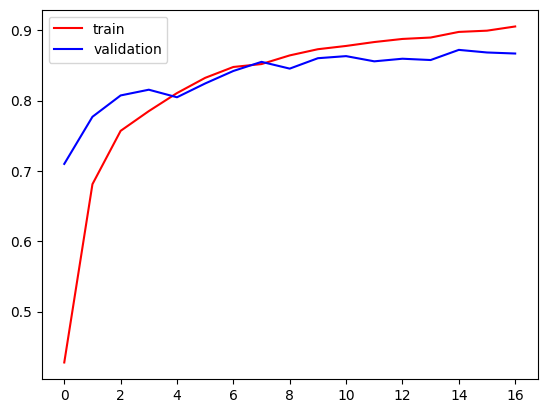

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

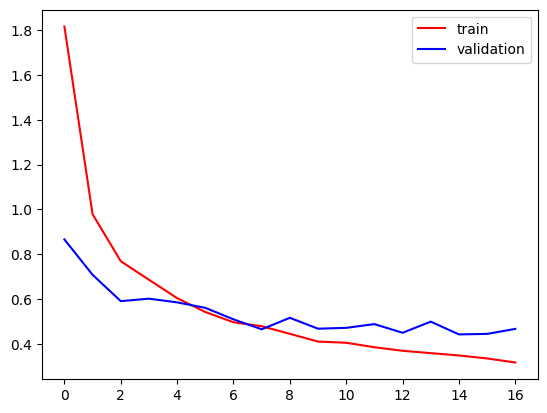

In [9]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [10]:
# Import pickle Package

import pickle
# # Save the Modle to file in the current working directory
Pkl_Filename = "ASL_TL_Model_with_augmentation_1.pkl"
with open(Pkl_Filename, 'wb') as file:
    pickle.dump(model, file)

In [11]:
from keras.models import load_model
model.save('ASL_TL_with_augmentation_1.h5')

85/85 ━━━━━━━━━━━━━━━━━━━━ 27s 308ms/step


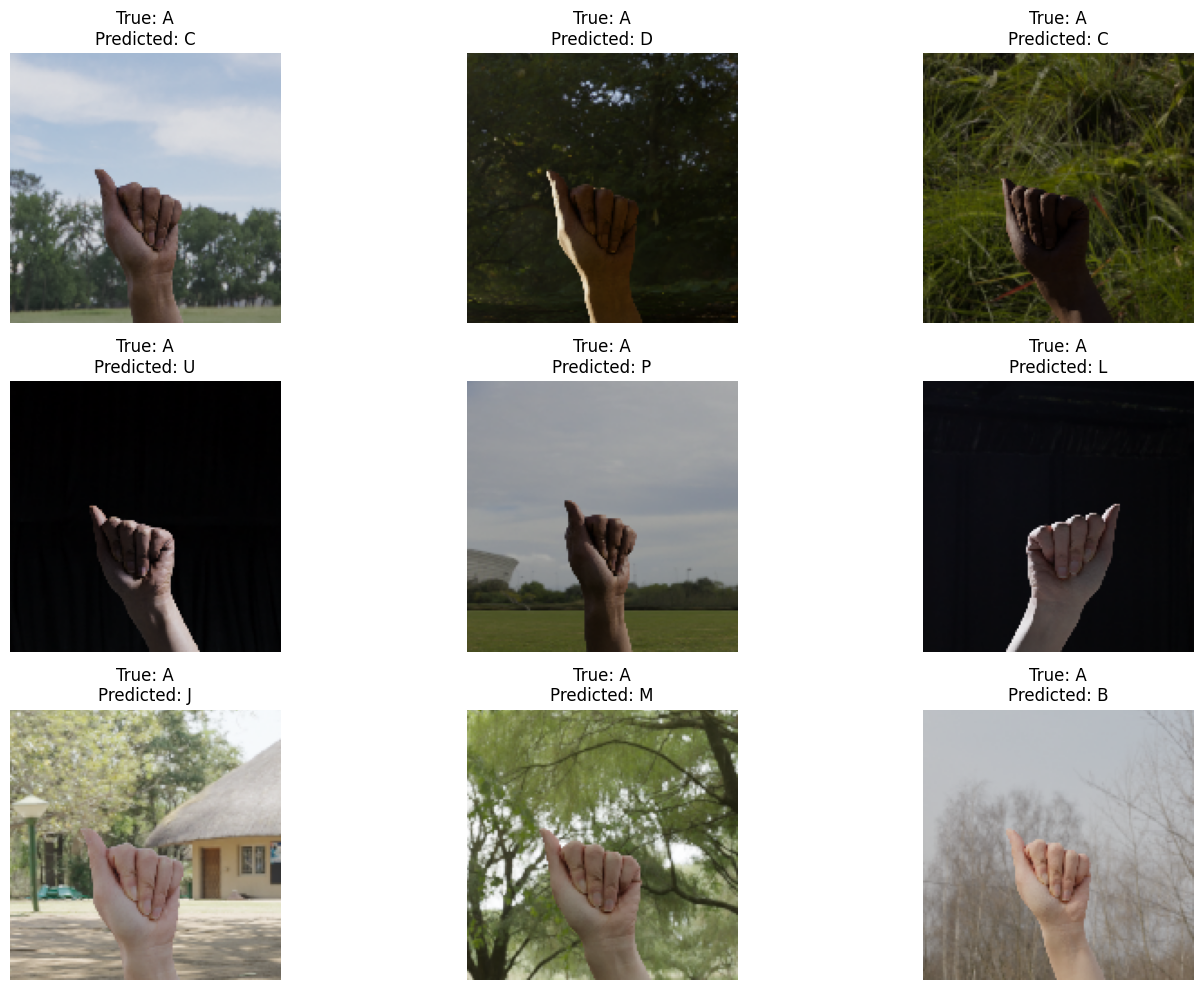

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Generate predictions on the validation set
predictions = model.predict(validation_generator)

# Convert predictions and labels to classes
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_generator.classes

# Find incorrect predictions
incorrect_indices = np.where(predicted_classes != true_classes)[0]

# Visualize some of the incorrect predictions
plt.figure(figsize=(15, 10))
for i, incorrect_index in enumerate(incorrect_indices[:9]):
    img_path = validation_generator.filepaths[incorrect_index]
    img = load_img(img_path, target_size=(150, 150))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    
    predicted_label = class_labels[predicted_classes[incorrect_index]]
    true_label = class_labels[true_classes[incorrect_index]]
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[0])
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Generate predictions on the test set
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/synthetic-asl-alphabet/Test_Alphabet',
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important to keep same order as predictions
)

predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f"Accuracy: {accuracy:.4f}")

# Generate and print classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)


Found 2700 images belonging to 27 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 306ms/step
Accuracy: 0.8678
Classification Report:
              precision    recall  f1-score   support

           A       0.90      0.91      0.91       100
           B       0.83      0.90      0.86       100
       Blank       0.93      0.99      0.96       100
           C       1.00      0.97      0.98       100
           D       0.88      0.84      0.86       100
           E       0.92      0.77      0.84       100
           F       0.97      0.84      0.90       100
           G       0.98      0.96      0.97       100
           H       0.94      0.98      0.96       100
           I       0.92      0.90      0.91       100
           J       0.90      0.90      0.90       100
           K       0.87      0.78      0.82       100
           L       0.95      0.94      0.94       100
           M       0.85      0.64      0.73       100
           N       0.69      0.84      0.76       100
           O       0.89      0.92      0.91       100